In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn import datasets, svm, model_selection, tree, preprocessing, metrics
import sklearn.ensemble as ske
import tensorflow as tf
from tensorflow.contrib import learn # skflow

In [10]:
# DEMO Daten anzeigen
titanic_df = pd.read_excel('data/titanic3.xls', 'titanic3', index_col=None, na_values=['NA'])
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
# Überlebenschance - Panda mean Funktion - Mittelwert über eine Achse:
titanic_df["survived"].mean()

0.3819709702062643

In [11]:
# Gruppieren nach der Klasse - 1 ... 3
class_grouping = titanic_df.groupby('pclass').mean()
class_grouping

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


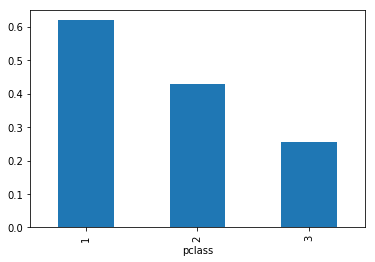

In [17]:
class_grouping['survived'].plot.bar()

In [19]:
class_sex_grouping = titanic_df.groupby(['pclass','sex']).mean()
class_sex_grouping

survived        age     sibsp     parch        fare        body
pclass sex                                                                    
1      female  0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       male    0.340782  41.029250  0.340782  0.279330   69.888385  162.828571
2      female  0.886792  27.499191  0.500000  0.650943   23.234827   52.000000
       male    0.146199  30.815401  0.327485  0.192982   19.904946  171.233333
3      female  0.490741  22.185307  0.791667  0.731481   15.324250  183.000000
       male    0.152130  25.962273  0.470588  0.255578   12.415462  151.854167

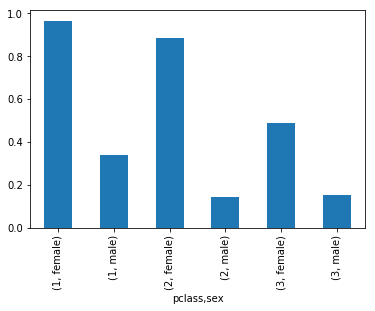

In [20]:
class_sex_grouping['survived'].plot.bar()

In [49]:
group_by_age = pd.cut(titanic_df["age"], np.arange(0, 90, 10))
age_grouping = titanic_df.groupby(group_by_age).mean()
age_grouping

,pclass,survived,age,sibsp,parch,fare,body
age,,,,,,,
"(0, 10]",2.651163,0.581395,4.304264,1.709302,1.406977,29.436044,4.000000
"(10, 20]",2.524691,0.395062,17.283951,0.611111,0.395062,28.807050,159.307692
"(20, 30]",2.371191,0.371191,25.324100,0.326870,0.218837,28.159013,170.393939
"(30, 40]",2.109524,0.423810,35.121429,0.361905,0.414286,42.701507,155.343750
"(40, 50]",1.787879,0.393939,45.367424,0.378788,0.409091,47.254231,151.909091
"(50, 60]",1.387097,0.483871,55.185484,0.419355,0.370968,61.943347,159.777778
"(60, 70]",1.518519,0.222222,63.537037,0.333333,0.444444,66.131250,207.875000
"(70, 80]",1.666667,0.333333,73.750000,0.166667,0.000000,34.755567,96.500000


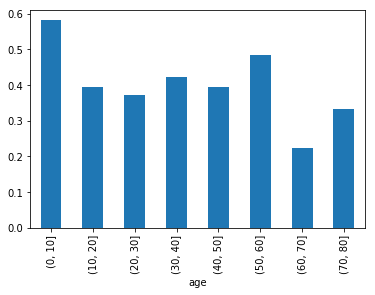

In [25]:
age_grouping['survived'].plot.bar()

In [29]:
# welche daten fehlen?
titanic_df.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
embarked     1307
home.dest    1309
dtype: int64

In [12]:
titanic_df2 = titanic_df.drop(['body','cabin','boat'], axis=1)
# Herkunft auffüllen:
titanic_df2["home.dest"] = titanic_df2["home.dest"].fillna("NA")
titanic_df2.count()
# Datensätze die immer noch nicht komplett sind rauswerfen
titanic_df3 = titanic_df2.dropna()

In [50]:
titanic_df3
titanic_df3.count()

pclass       1043
survived     1043
name         1043
sex          1043
age          1043
sibsp        1043
parch        1043
ticket       1043
fare         1043
embarked     1043
home.dest    1043
dtype: int64

In [13]:
# formatierungen für algorithmen
def preprocess_titanic_df(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df.sex = le.fit_transform(processed_df.sex)
    processed_df.embarked = le.fit_transform(processed_df.embarked) # wo zugestiegen
    processed_df = processed_df.drop(['name','ticket','home.dest'],axis=1)
    return processed_df

In [14]:
processed_df = preprocess_titanic_df(titanic_df3)
processed_df


,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.0000,0,0,211.3375,2
1,1,1,1,0.9167,1,2,151.5500,2
2,1,0,0,2.0000,1,2,151.5500,2
3,1,0,1,30.0000,1,2,151.5500,2
4,1,0,0,25.0000,1,2,151.5500,2
5,1,1,1,48.0000,0,0,26.5500,2
6,1,1,0,63.0000,1,0,77.9583,2
7,1,0,1,39.0000,0,0,0.0000,2
8,1,1,0,53.0000,2,0,51.4792,2
9,1,0,1,71.0000,0,0,49.5042,0


In [16]:
# Ergebnis aus den Daten entfernen und separat speichern
X = processed_df.drop(['survived'], axis=1).values
y = processed_df['survived'].values

In [62]:
X

array([[   1.    ,    0.    ,   29.    , ...,    0.    ,  211.3375,    2.    ],
       [   1.    ,    1.    ,    0.9167, ...,    2.    ,  151.55  ,    2.    ],
       [   1.    ,    0.    ,    2.    , ...,    2.    ,  151.55  ,    2.    ],
       ..., 
       [   3.    ,    1.    ,   26.5   , ...,    0.    ,    7.225 ,    0.    ],
       [   3.    ,    1.    ,   27.    , ...,    0.    ,    7.225 ,    0.    ],
       [   3.    ,    1.    ,   29.    , ...,    0.    ,    7.875 ,    2.    ]])

In [18]:
# Trainings und Testdaten erzeugen / 80:20 aufspalten 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2)

In [74]:
print (len(processed_df))
print (len(X_train))
print (len(X_test))
print (len(y_train))
print (len(y_test))

1043
834
209
834
209


In [76]:
clf_dt = tree.DecisionTreeClassifier(max_depth=10) #Entscheidungsbaum aufbauen

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [79]:
clf_dt.fit (X_train, y_train) #trainieren/anpassen mit Trainingsdaten
clf_dt.score (X_test, y_test) #bewertung, wie gut unsere Ergebnisse sind => 0.5 wäre schätzen 
# hier mit 75% Genauigkeit stimmt unsere errechnete Überlebensvorhersage 

0.74641148325358853

In [85]:
# hängt natürlich auch mit der Reihenfolge unserer Trainings-/Testdaten zusammen 
# zufällige Wahl dieser: 
shuffle_validator = model_selection.ShuffleSplit(n_splits=20, test_size=0.2, train_size=0.8, random_state=0) # len(X), n_iter=20, test_size=0.2, random_state=0)
def test_classifier(clf):
    scores = model_selection.cross_val_score(clf, X, y, cv=shuffle_validator)
    print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std()))

In [86]:
test_classifier(clf_dt)

Accuracy: 0.7742 (+/- 0.02)


In [87]:
# Verschiedene Klassifikatoren testen:
clf_rf = ske.RandomForestClassifier(n_estimators=50)
test_classifier(clf_rf)

Accuracy: 0.7801 (+/- 0.02)


In [88]:
clf_gb = ske.GradientBoostingClassifier(n_estimators=50)
test_classifier(clf_gb)

Accuracy: 0.8201 (+/- 0.02)


In [89]:
eclf = ske.VotingClassifier([('dt', clf_dt), ('rf', clf_rf), ('gb', clf_gb)])
test_classifier(eclf)

Accuracy: 0.8060 (+/- 0.02)


In [ ]:
#tf_clf_dnn = skflow.TensorFlowDNNClassifier(hidden_units=[20, 40, 20], n_classes=2, batch_size=256, steps=1000, learning_rate=0.05)
#tf_clf_dnn.fit(X_train, y_train)
#tf_clf_dnn.score(X_test, y_test)

In [2]:
import sys
print(sys.executable)
# test tensorflow 
import tensorflow as tk
hello = tk.constant("hi")
se = tk.Session()
print (se.run(hello))

C:\ProgramData\Anaconda3\python.exe


In [41]:
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(processed_df)
# Build 3 layer DNN with 10, 20, 10 units respectively.
classifier = learn.DNNClassifier(hidden_units=[10, 20, 10], n_classes=3,feature_columns=feature_columns, model_dir="/tmp/my_model")
classifier.fit(X_train, y_train, steps=300, batch_size=32)
survived_predictions = list(classifier.predict(X, as_iterable=True))
score = metrics.accuracy_score(y, survived_predictions)
print('Accuracy: %f' % score)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000219E071BBE0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/my_model'}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for u

In [36]:
survived_predictions = list(classifier.predict(X, as_iterable=True))
score = metrics.accuracy_score(y, survived_predictions)
print('Accuracy: %f' % score)

Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters from /tmp/my_model\model.ckpt-269178
Accuracy: 0.797699
